In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from tqdm import tqdm

import keras
from keras.preprocessing import image
import plotly.express as px
import plotly.io as io

import utility.recommendations_utility as ru

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [25]:
# reading for colab
df = pd.read_feather('/content/drive/MyDrive/Colab_Notebooks/dataset_2_0.feather')

In [8]:
image_viz = np.load('/content/drive/MyDrive/Colab_Notebooks/image_viz.npy', allow_pickle=True)

In [9]:
df.head()

image_id look_id                                      image_feature  \
0         0       0  [0.14402035, 0.0, 0.06851762, 0.019945193, 0.0...   
1         4       0  [0.0, 0.88556725, 0.19156538, 0.0, 0.015560213...   
2         5       0  [0.0, 0.0, 0.5255391, 0.023882672, 0.027020002...   
3         6       0  [0.08603569, 0.06738109, 0.042635284, 0.0, 0.0...   
4         7       0  [0.0, 0.7953321, 0.39364594, 0.0, 0.009705626,...   

      tsne_0     tsne_1  
0  -9.276743 -39.226650  
1  60.068588  -4.728771  
2 -26.301043  26.623367  
3  31.248148  19.657444  
4  42.144360  39.409893

In [10]:
tsne_0, tsne_1 = np.array(df['tsne_0']), np.array(df['tsne_1'])
tsne_2dim = np.array([val for val in zip(tsne_0, tsne_1)])

# NEXT STEP:
Make/find a model that can recommend certain items to complete the look. For example, recommend boots to some top, bot and accessories.

In [ ]:
# requires too much time for my dataframe
%%time
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(n_clusters=20,
                        assign_labels='discretize',
                        verbose=True,
                        random_state=42,
                        n_jobs=-1
                        ).fit(tsne_2dim)
labels = sc.labels_ # getting the labels
print(len(np.unique(labels)))

In [11]:
%%time 
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=20,
                                     linkage='ward'
                                     ).fit(tsne_2dim)
labels = clustering.labels_

CPU times: user 9.69 s, sys: 541 ms, total: 10.2 s
Wall time: 11.8 s


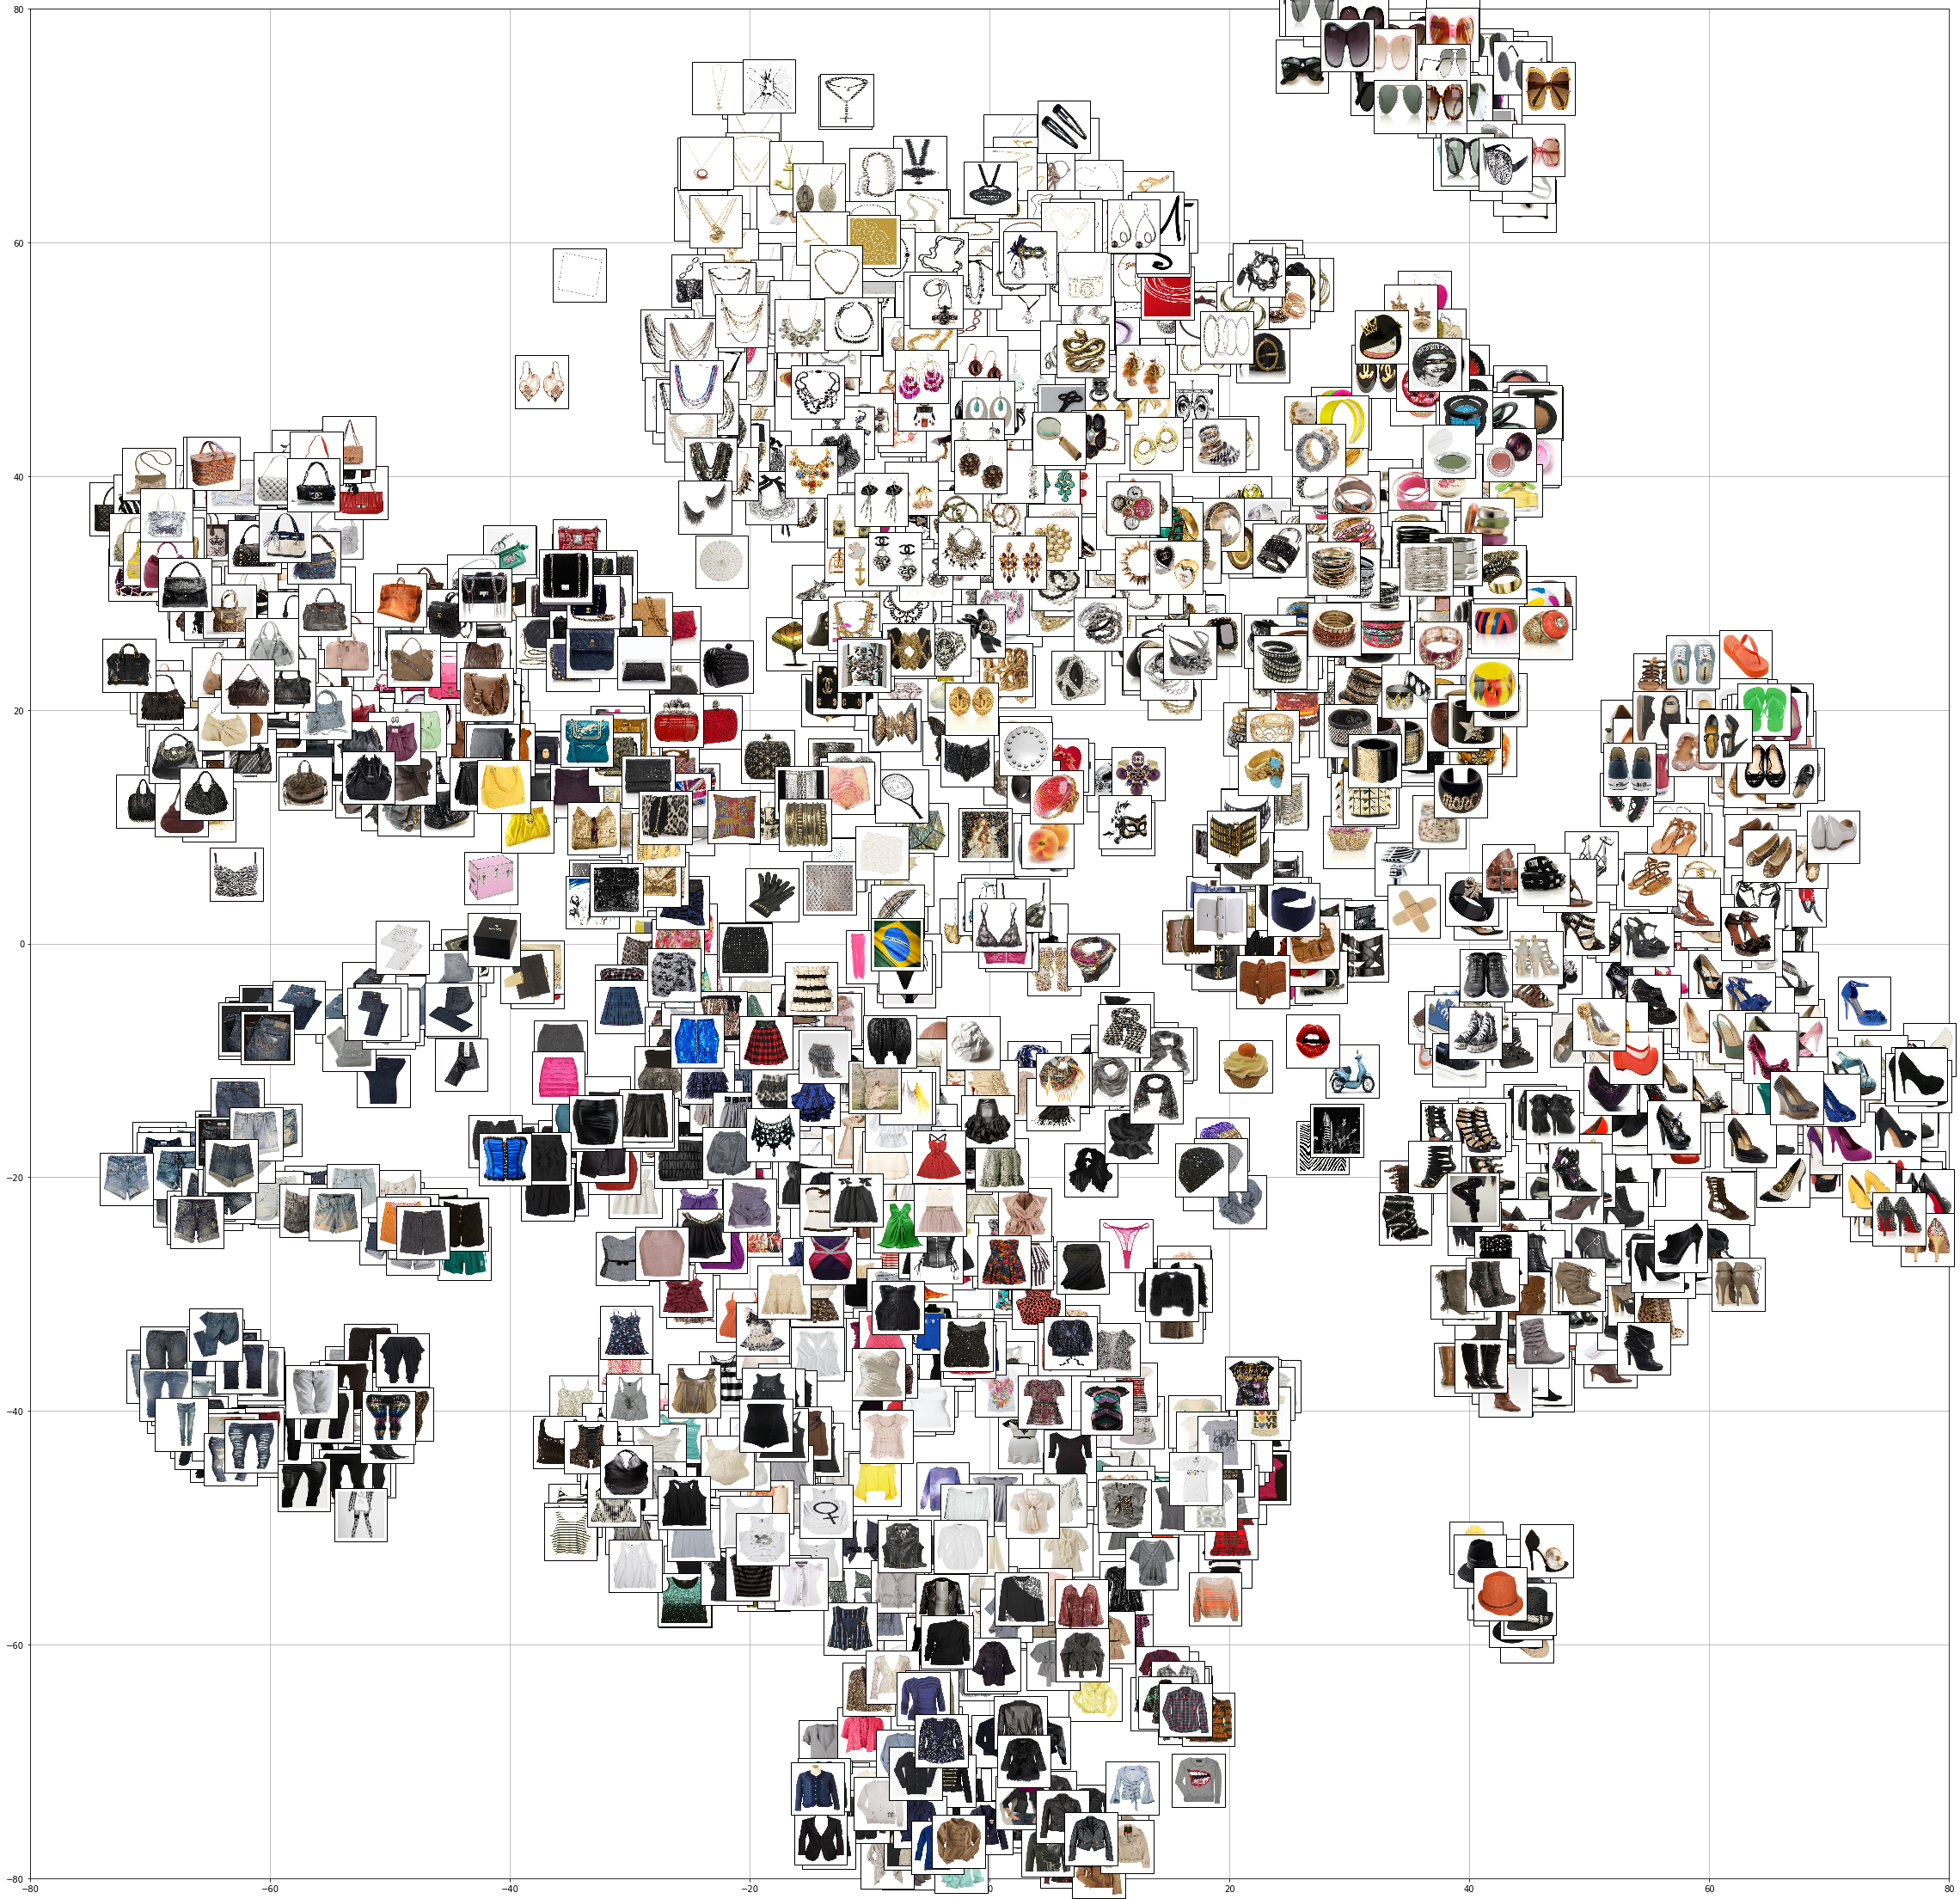

In [14]:
# Plot the clusters
xlim = (-80, 80)
ylim = (-80, 80)

fig, ax = plt.subplots(figsize=(40, 40))
ax.set_xlim(xlim)
ax.set_ylim(ylim)
for i in range(2000):
    imagebox = OffsetImage(image_viz[i], zoom=0.24)
    ab = AnnotationBbox(imagebox, (tsne_2dim[i, 0], tsne_2dim[i, 1]))
    ax.add_artist(ab)

plt.grid()
plt.draw()
plt.show()

In [15]:
fig = px.scatter(
    x=tsne_2dim[:, 0],
    y=tsne_2dim[:, 1],
    color=labels,
    template="plotly_white",
    color_continuous_scale=px.colors.sequential.Rainbow,
    width=1500, height=1300
)

fig.update_traces(textposition="top center")
fig.show()

In [16]:
item_classes = {  
    0:'top',
    1:'bags',
    2:'accessories',
    3:'hats',
    4:'bot',
    5:'boots',
    6:'dresses',
    7:'accessories',
    8:'top',
    9:'accessories',
    10:'boots',
    11:'accessories',
    12:'bags',
    13:'accessories',
    14:'accessories',
    15:'accessories',
    16:'bot',
    17:'top',
    18:'boots',
    19:'useless',
    20:'top'
}

top = [0, 8, 17, 20]
bot = [4, 16]
boots = [5, 10, 18]
accessories = [2, 7 , 9, 11, 13, 14, 15]
dresses = [6]
hats = [3]
bags = [1, 12]

In [26]:
df['label'] = labels

In [22]:
def correct_labels(labels):
    corr_labels = []
    for label in labels:
        if label in top:
            corr_labels.append(0)
        elif label in bot:
            corr_labels.append(1)
        elif label in boots:
            corr_labels.append(2)
        elif label in accessories:
            corr_labels.append(3)
        elif label in hats:
            corr_labels.append(4)
        elif label in bags:
            corr_labels.append(5)
        elif label in dresses:
            corr_labels.append(6)
        elif label == 19:
            corr_labels.append(-1)
    
    return corr_labels

In [27]:
df['label'] = correct_labels(df.label)

In [28]:
df

image_id look_id                                      image_feature  \
0             0       0  [0.14402035, 0.0, 0.06851762, 0.019945193, 0.0...   
1             4       0  [0.0, 0.88556725, 0.19156538, 0.0, 0.015560213...   
2             5       0  [0.0, 0.0, 0.5255391, 0.023882672, 0.027020002...   
3             6       0  [0.08603569, 0.06738109, 0.042635284, 0.0, 0.0...   
4             7       0  [0.0, 0.7953321, 0.39364594, 0.0, 0.009705626,...   
...         ...     ...                                                ...   
12460     26027    2058  [0.04144365, 0.3307748, 0.0, 0.04235907, 0.032...   
12461     26030    2059  [0.8599309, 0.0, 0.07701803, 0.0018922747, 0.0...   
12462     26032    2059  [0.0, 1.0185515, 0.04129585, 0.00038612133, 0....   
12463     26035    2059  [0.0, 0.06651391, 0.0, 0.07319508, 0.047552824...   
12464     26036    2059  [0.16836591, 0.054368038, 0.09972753, 0.028250...   

          tsne_0     tsne_1  label  
0      -9.276743 -39.226650      0  
1      60.068588  -4.728771      2  
2     -26.301043  26.623367      5  
3      31.248148  19.657444      3  
4      42.144360  39.409893      3  
...          ...        ...    ...  
12460   8.946985  58.889259      3  
12461  -5.890331 -34.954437      6  
12462  70.084412 -15.791395      2  
12463 -36.601360  23.826004      5  
12464  41.603714  46.294662      3  

[12465 rows x 6 columns]

*   top : 0 
*   bot : 1
*   boots : 2
*   accessories : 3
*   hats : 4
*   bags : 5
*   dresses : 6
*   useless : -1

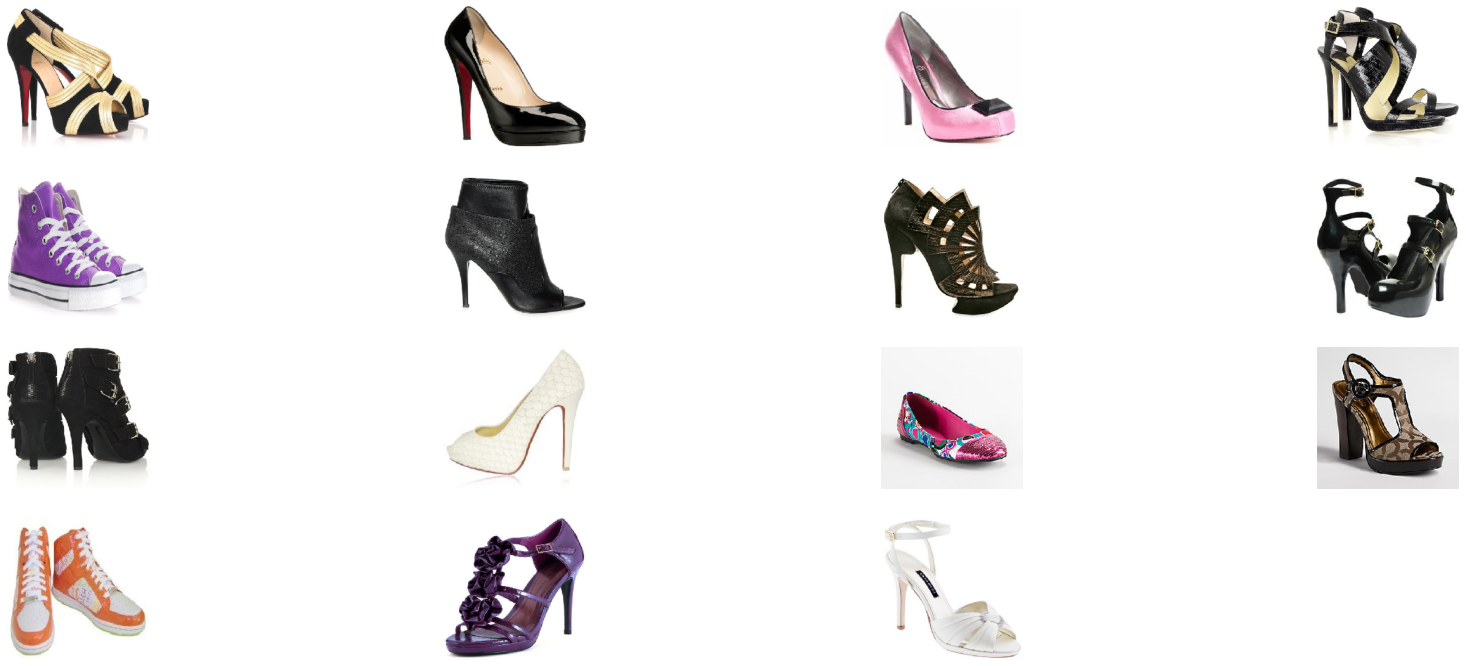

In [30]:
# show 15 items of some class
plt.figure(figsize=(30,12))
for i, idx in enumerate(list(df.query('label == 2').index)[:15:]):
    plt.subplot(4,4,i+1) 
    plt.imshow(image_viz[idx])
    plt.axis('off')

In [31]:
feedback = ru.get_feedback_df(df)

In [32]:
# for colab
!pip install cornac

     |████████████████████████████████| 12.4 MB 529 kB/s 


In [33]:
import cornac
from cornac.data import ImageModality
from cornac.eval_methods import RatioSplit

In [34]:
# Create CausalRec
causalrec = cornac.models.CausalRec(
    k=50,
    k2=50,
    n_epochs=45,
    batch_size=32,
    learning_rate=0.0008,
    lambda_w=1,
    lambda_b=0.01,
    lambda_e=0.0,
    mean_feat=df['image_feature'].mean(),
    tanh=0,
    lambda_2=0.5,
    use_gpu=True,
    seed=42
)

In [35]:
# Instantiate a ImageModality, it makes it convenient to work with visual auxiliary information
# For more details, please refer to the tutorial on how to work with auxiliary data
item_image_modality = ImageModality(features=np.vstack(df['image_feature']), 
                                    ids=[str(x) for x in np.arange(df.shape[0])],
                                    normalized=True)

# Define an evaluation method to split feedback into train and test sets
ratio_split = RatioSplit(
    data=feedback,
    test_size=0.25,
    rating_threshold=0.5,
    exclude_unknowns=False,
    verbose=True,
    item_image=item_image_modality,
    
)

rating_threshold = 0.5
exclude_unknowns = False
---
Training data:
Number of users = 2035
Number of items = 9348
Number of ratings = 9348
Max rating = 1.0
Min rating = 1.0
Global mean = 1.0
---
Test data:
Number of users = 1627
Number of items = 3117
Number of ratings = 3117
Number of unknown users = 10
Number of unknown items = 3117
---
Total users = 2045
Total items = 12465


In [36]:
# Instantiate evaluation measures
rec = cornac.metrics.Recall(k=50)
prec = cornac.metrics.Precision(k=50)
ndcg = cornac.metrics.NDCG(k=50)
map = cornac.metrics.MAP()

In [37]:
cornac.Experiment(
    eval_method=ratio_split, 
    models=[causalrec], 
    metrics=[rec, prec, ndcg, map]
).run()


[CausalRec] Training started!


/usr/local/lib/python3.7/dist-packages/cornac/models/causalrec/recom_causalrec.py:241: UserWarning:

Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)



Epoch 1/45:   0%|          | 0/293 [00:00<?, ?it/s]

Epoch 2/45:   0%|          | 0/293 [00:00<?, ?it/s]

Epoch 3/45:   0%|          | 0/293 [00:00<?, ?it/s]

Epoch 4/45:   0%|          | 0/293 [00:00<?, ?it/s]

Epoch 5/45:   0%|          | 0/293 [00:00<?, ?it/s]

Epoch 6/45:   0%|          | 0/293 [00:00<?, ?it/s]

Epoch 7/45:   0%|          | 0/293 [00:00<?, ?it/s]

Epoch 8/45:   0%|          | 0/293 [00:00<?, ?it/s]

Epoch 9/45:   0%|          | 0/293 [00:00<?, ?it/s]

Epoch 10/45:   0%|          | 0/293 [00:00<?, ?it/s]

Epoch 11/45:   0%|          | 0/293 [00:00<?, ?it/s]

Epoch 12/45:   0%|          | 0/293 [00:00<?, ?it/s]

Epoch 13/45:   0%|          | 0/293 [00:00<?, ?it/s]

Epoch 14/45:   0%|          | 0/293 [00:00<?, ?it/s]

Epoch 15/45:   0%|          | 0/293 [00:00<?, ?it/s]

Epoch 16/45:   0%|          | 0/293 [00:00<?, ?it/s]

Epoch 17/45:   0%|          | 0/293 [00:00<?, ?it/s]

Epoch 18/45:   0%|          | 0/293 [00:00<?, ?it/s]

Epoch 19/45:   0%|          | 0/293 [00:00<?, ?it/s]

Epoch 20/45:   0%|          | 0/293 [00:00<?, ?it/s]

Epoch 21/45:   0%|          | 0/293 [00:00<?, ?it/s]

Epoch 22/45:   0%|          | 0/293 [00:00<?, ?it/s]

Epoch 23/45:   0%|          | 0/293 [00:00<?, ?it/s]

Epoch 24/45:   0%|          | 0/293 [00:00<?, ?it/s]

Epoch 25/45:   0%|          | 0/293 [00:00<?, ?it/s]

Epoch 26/45:   0%|          | 0/293 [00:00<?, ?it/s]

Epoch 27/45:   0%|          | 0/293 [00:00<?, ?it/s]

Epoch 28/45:   0%|          | 0/293 [00:00<?, ?it/s]

Epoch 29/45:   0%|          | 0/293 [00:00<?, ?it/s]

Epoch 30/45:   0%|          | 0/293 [00:00<?, ?it/s]

Epoch 31/45:   0%|          | 0/293 [00:00<?, ?it/s]

Epoch 32/45:   0%|          | 0/293 [00:00<?, ?it/s]

Epoch 33/45:   0%|          | 0/293 [00:00<?, ?it/s]

Epoch 34/45:   0%|          | 0/293 [00:00<?, ?it/s]

Epoch 35/45:   0%|          | 0/293 [00:00<?, ?it/s]

Epoch 36/45:   0%|          | 0/293 [00:00<?, ?it/s]

Epoch 37/45:   0%|          | 0/293 [00:00<?, ?it/s]

Epoch 38/45:   0%|          | 0/293 [00:00<?, ?it/s]

Epoch 39/45:   0%|          | 0/293 [00:00<?, ?it/s]

Epoch 40/45:   0%|          | 0/293 [00:00<?, ?it/s]

Epoch 41/45:   0%|          | 0/293 [00:00<?, ?it/s]

Epoch 42/45:   0%|          | 0/293 [00:00<?, ?it/s]

Epoch 43/45:   0%|          | 0/293 [00:00<?, ?it/s]

Epoch 44/45:   0%|          | 0/293 [00:00<?, ?it/s]

Epoch 45/45:   0%|          | 0/293 [00:00<?, ?it/s]

Optimization finished!

[CausalRec] Evaluation started!


Ranking:   0%|          | 0/1627 [00:00<?, ?it/s]


TEST:
...
          |    MAP | NDCG@50 | Precision@50 | Recall@50 | Train (s) | Test (s)
--------- + ------ + ------- + ------------ + --------- + --------- + --------
CausalRec | 0.0006 |  0.0008 |       0.0001 |    0.0028 |  258.3478 |  11.3561



In [38]:
user_id = '52'
model_score = causalrec.score(int(user_id)) 
top_50_idx = np.argsort(model_score)[-50:]

In [39]:
df.query("look_id == @user_id")

image_id look_id                                      image_feature  \
315       619      52  [0.0, 0.0, 0.048633985, 0.0, 0.007229406, 0.02...   
316       620      52  [0.035264052, 1.9412105, 0.288199, 0.0, 0.0080...   
317       621      52  [0.09908997, 0.027697243, 0.42867774, 0.0, 0.0...   
318       622      52  [0.0, 0.29430056, 0.32623821, 0.0, 0.0, 0.0, 0...   
319       623      52  [0.11193524, 0.0, 0.0, 0.0, 0.022272693, 0.0, ...   

        tsne_0     tsne_1  label  
315 -26.738951 -26.576717      6  
316  66.861252  -6.053685      2  
317  -2.211298  35.047363      3  
318  -2.116704  40.969372      3  
319 -37.018093  15.217006      5

In [40]:
# ITEMS THAT USER LIKED
recommended_idxs = list(df.query("look_id == @user_id").index)
plt.figure(figsize=(30,12))
for i, idx in enumerate(recommended_idxs):
    plt.subplot(4,4,i+1) 
    plt.imshow(image_viz[idx])
    plt.axis('off')

In [41]:
# ITEMS THAT WERE RECOMMENDED TO USER
plt.figure(figsize=(30, 10))  # specifying the overall grid size
for i, idx in enumerate(top_50_idx):
    plt.subplot(5, 10, i+1)
    plt.imshow(image_viz[idx])
    plt.axis('off')

In [3]:
df = pd.read_feather("data/dataset_2_0.feather")

In [8]:
ru.get_feedback_df(df)

[('0', '0', 1),
 ('0', '4', 1),
 ('0', '5', 1),
 ('0', '6', 1),
 ('0', '7', 1),
 ('1', '12', 1),
 ('1', '17', 1),
 ('1', '18', 1),
 ('1', '21', 1),
 ('1', '22', 1),
 ('1', '23', 1),
 ('2', '25', 1),
 ('2', '30', 1),
 ('2', '32', 1),
 ('2', '33', 1),
 ('2', '34', 1),
 ('2', '39', 1),
 ('3', '40', 1),
 ('3', '43', 1),
 ('3', '50', 1),
 ('4', '51', 1),
 ('4', '52', 1),
 ('4', '53', 1),
 ('4', '55', 1),
 ('4', '56', 1),
 ('4', '57', 1),
 ('5', '58', 1),
 ('5', '59', 1),
 ('5', '60', 1),
 ('5', '61', 1),
 ('6', '68', 1),
 ('6', '75', 1),
 ('6', '79', 1),
 ('6', '80', 1),
 ('6', '81', 1),
 ('7', '83', 1),
 ('7', '84', 1),
 ('7', '88', 1),
 ('7', '89', 1),
 ('7', '91', 1),
 ('7', '93', 1),
 ('7', '94', 1),
 ('8', '95', 1),
 ('8', '96', 1),
 ('8', '97', 1),
 ('8', '98', 1),
 ('8', '99', 1),
 ('8', '101', 1),
 ('9', '103', 1),
 ('9', '106', 1),
 ('9', '107', 1),
 ('9', '108', 1),
 ('9', '110', 1),
 ('10', '114', 1),
 ('10', '117', 1),
 ('10', '118', 1),
 ('10', '120', 1),
 ('10', '121', 1),
 ('